In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TOPIC AND SENTIMENT INTENSITY + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 1 (70-15-15).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,...,18,20,0,32,0,8,98.4,53.3,109,Train
2008-01-02,411032,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,...,10,19,5,39,7,5,90.8,53.0,108,Train
2008-01-03,414332,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,...,38,28,6,30,0,0,89.5,53.4,106,Train
2008-01-04,395900,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,...,25,22,8,45,0,8,82.6,56.4,106,Train
2008-01-05,366387,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,...,16,22,5,47,0,9,79.8,57.2,106,Train


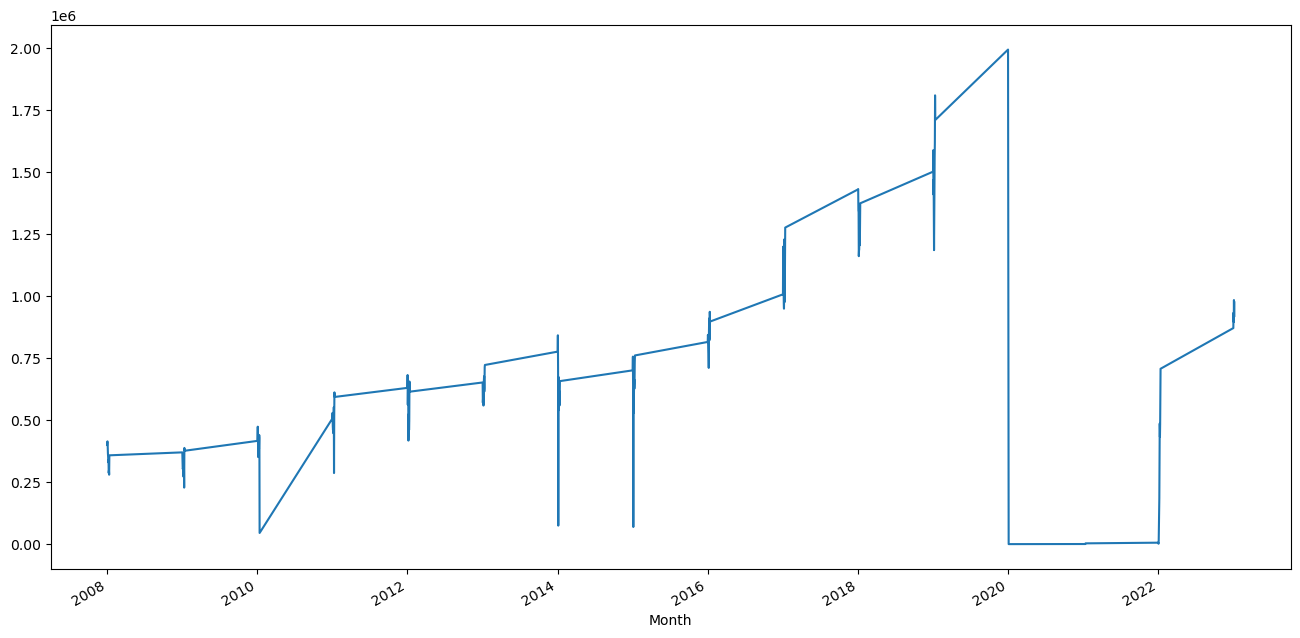

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  NegativityQDAP  PositivityQDAP   TOPIC 1  \
Month                                                                   
2008-01-01           399556        0.181818        0.090909  0.008715   
2008-01-02           411032        0.000000        0.090909  0.009085   
2008-01-03           414332        0.142857        0.000000  0.008164   
2008-01-04           395900        0.214286        0.071429  0.007528   
2008-01-05           366387        0.000000        0.100000  0.008862   
...                     ...             ...             ...       ...   
2023-01-02           932969        0.000000        0.181818  0.014135   
2023-01-03           895425        0.000000        0.142857  0.007677   
2023-01-04           984146        0.000000        0.222222  0.014135   
2023-01-05           916257        0.000000        0.125000  0.014135   
2023-01-06           975010        0.000000        0.111111  0.012180   

             TOPIC 2   TOPIC 3   TOPIC 4   TOPIC 5

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.25 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.27 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.09 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.37 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.06 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.06 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/02/2019'].dropna()
test = df1['Tourist Arrival']['01/03/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/02/2019'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/03/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17565D+01    |proj g|=  4.97291D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   36      0      1      0     0     0   4.973D-06   1.176D+01
  F =   11.756528198142677     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  134
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1575.375
Date:                            Wed, 23 Aug 2023   AIC                           3222.750
Time:                                    22:25:35   BIC                           3323.398
Sample:                                         0   HQIC                          3263.627
                                            - 134                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
NegativityQDAP           2.553e+05    1.5e+05      1.701      0.089   -3.89e+04    5.49e+05
PositivityQDAP           3.321e+05   1.52e+05      2.178      0.029    3.32e+04    6.31e+05
TOPIC 1                 -1.201e+05    1.2e+05     -0.998      0.318   -3.56e+05    1.16e+05
TOPIC 2                 -1.879e+05   7.13e+04     -2.637      0.008   -3.28e+05   -4.82e+04
TOPIC 3                 -2.888e+04   7.13e+04     -0.405      0.686   -1.69e+05    1.11e+05
TOPIC 4                 -9.316e+04   5.09e+04     -1.832      0.067   -1.93e+05    6520.577
TOPIC 5                 -5.783e+04   6.62e+04     -0.873      0.383   -1.88e+05     7.2e+04
TOPIC 6                 -6.938e+04   1.45e+05     -0.477      0.633   -3.54e+05    2.16e+05
TOPIC 7                 -9.186e+04   5.66e+04     -1.622      0.105   -2.03e+05    1.92e+04
TOPIC 8                  -6.65e+04   6.17e+04     -1.078      0.281   -1.87e+05    5.44e+04
TOPIC 9                 -1.146e+05   5.29e+04     -2.167      0.030   -2.18e+05    -1.1e+04
TOPIC 10                -9.672e+04   6.39e+04     -1.513      0.130   -2.22e+05    2.86e+04
Airbnb Vietnam          -1418.1278   2873.898     -0.493      0.622   -7050.865    4214.610
Vietnam restaurant       3280.5072   3171.380      1.034      0.301   -2935.284    9496.298
Shopping in Hanoi        -947.8031   3601.962     -0.263      0.792   -8007.520    6111.913
Shopping in Ho Chi Minh   414.8611   3917.215      0.106      0.916   -7262.740    8092.462
 Vietnam tour           -2613.3808   5103.974     -0.512      0.609   -1.26e+04    7390.224
 Skyscanner              -466.0261   6053.549     -0.077      0.939   -1.23e+04    1.14e+04
 Vietnam visa              39.6545   5031.430      0.008      0.994   -9821.767    9901.076
 Vietnam airport         1598.7036   3823.894      0.418      0.676   -5895.990    9093.397
 Vietnam flights          678.9814   4477.648      0.152      0.879   -8097.048    9455.010
 Danang airport         -1136.4845   2161.172     -0.526      0.599   -5372.305    3099.336
 Hoi An                 -2438.2994   2662.905     -0.916      0.360   -7657.498    2780.899
 Vietnam weather          881.5039   2372.057      0.372      0.710   -3767.642    5530.650
 Visa for Vietnam         716.9257   5191.021      0.138      0.890   -9457.289    1.09e+04
 Sgn airport              581.7262   2788.397      0.209      0.835   -4883.432    6046.885
 Phu Quoc                3258.6220   2841.706      1.147      0.252   -2311.020    8828.264
 Vietnam itinerary      -1225.0263   2992.429     -0.409      0.682   -7090.080    4640.027
 Vietnam trip            3933.3047   2592.713      1.517      0.129   -1148.320    9014.930
 Things to do in Hue     1335.5097   3416.858      0.391      0.696   -5361.410    8032.429
 Vietnam backpackers    -4157.3603   3811.942     -1.091      0.275   -1.16e+04    3313.909
CCI  

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 1319838.0337358909


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1167978.0089138185


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.659471027365945e+21


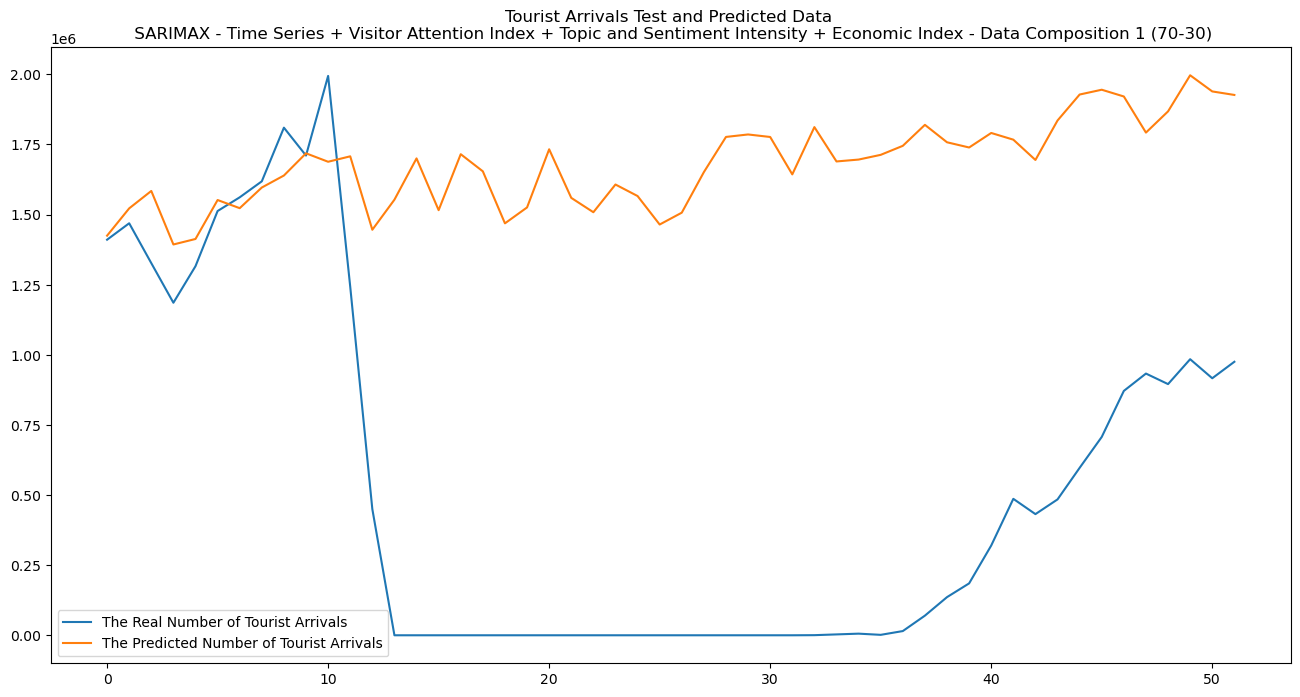

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index + Topic and Sentiment Intensity + Economic Index - Data Composition 1 (70-30)")
plt.legend()
plt.show()